<a href="https://colab.research.google.com/github/sulaksh26/Flower_Images_Detection/blob/main/TF26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

In [ ]:

!pip install pillow

In [ ]:
import PIL

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir
#Windows path object

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/184683023_737fec5b18.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2816503473_580306e772.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14244410747_22691ece4a_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14244273988_a7484f18b7_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4042816698_578a1d599e.jpg')]

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/7251352826_69b62cba2c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg')]

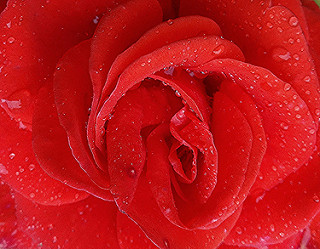

In [ ]:
PIL.Image.open(str(roses[0]))

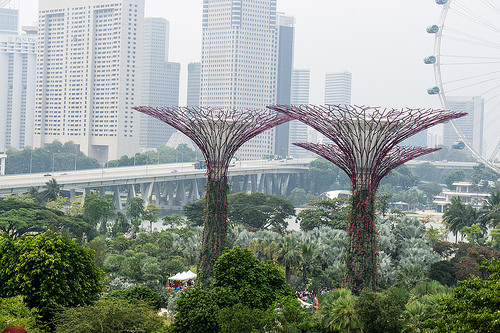

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


In [ ]:
#Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/7251352826_69b62cba2c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'

In [ ]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(249, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape
#We resize all images to 180x180 to train our model

(180, 180, 3)

In [ ]:
X,y=[],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Preprocessing: scale images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 104s 1s/step - loss: 1.3661 - accuracy: 0.4001
Epoch 2/30
86/86 [==============================] - 101s 1s/step - loss: 1.0294 - accuracy: 0.6032
Epoch 3/30
86/86 [==============================] - 99s 1s/step - loss: 0.8686 - accuracy: 0.6730
Epoch 4/30
86/86 [==============================] - 97s 1s/step - loss: 0.6964 - accuracy: 0.7442
Epoch 5/30
86/86 [==============================] - 97s 1s/step - loss: 0.5022 - accuracy: 0.8161
Epoch 6/30
86/86 [==============================] - 101s 1s/step - loss: 0.3538 - accuracy: 0.8652
Epoch 7/30
86/86 [==============================] - 99s 1s/step - loss: 0.2372 - accuracy: 0.9211
Epoch 8/30
86/86 [==============================] - 97s 1s/step - loss: 0.1435 - accuracy: 0.9557
Epoch 9/30
86/86 [==============================] - 97s 1s/step - loss: 0.1142 - accuracy: 0.9698
Epoch 10/30
86/86 [==============================] - 100s 1s/step - loss: 0.0560 - accuracy: 0.9873
Epoch 11/30
86/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 30s 1s/step - loss: 2.7732 - accuracy: 0.6460


[2.7732484340667725, 0.6459695100784302]

In [ ]:
#Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (64.5%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
predictions=model.predict(X_test_scaled)
predictions

29/29 [==============================] - 12s 411ms/step


array([[ 3.3461194e+00,  7.0907898e+00, -1.2319284e+01, -6.3832932e+00,
        -5.5946507e+00],
       [ 7.7558169e+00,  1.2516704e+01,  8.7564192e+00, -1.4406077e+01,
         2.5034189e+00],
       [ 1.2082473e+00,  2.3238797e+00, -1.4130771e-03, -2.7333934e+00,
        -1.0145117e+00],
       ...,
       [-1.7855337e+01, -1.9336018e+01, -6.2825885e+00,  1.5383958e+01,
        -3.4014568e+00],
       [ 5.0117865e+00, -8.0662947e+00, -7.3419895e+00, -1.7177082e+00,
         5.7930837e+00],
       [-1.1758122e+01,  4.6843510e+00, -1.8144011e+01,  5.2404375e+00,
        -8.6723270e+00]], dtype=float32)

In [ ]:
score=tf.nn.softmax(predictions[0])
#This converts predictions into probabilities between o and 1 i.e scaling

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

In [ ]:
#Improve Test Accuracy Using Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

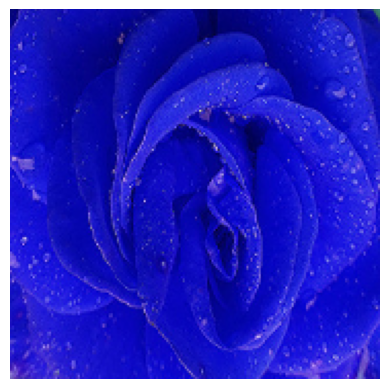

In [ ]:
#Original Image
plt.axis('off')
plt.imshow(X[0])

In [ ]:
#Newly generated training sample using data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
#Train the model using data augmentation and a drop out layer

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
#You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%